In [28]:
#rdkit関連のimport
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools

#randamforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#その他のimport
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import re

#データの規格化
def rescaling(features):
    norm_features = []
    max_value = max(features)
    min_value = min(features)
    for feature in features:
        norm_feature = (feature - min_value)/(max_value - min_value)
        norm_features.append(norm_feature)
    
    return norm_features

#SDFファイルの読み込み
mol_list  = Chem.SDMolSupplier("../../ForMolPredict/SDF_files/Ames/Ames_AllMol.sdf",removeHs=False) 
mol_num = len(mol_list)
print("there are {} molecules".format(mol_num))

there are 6134 molecules


In [29]:
#データの抽出
act_list = [mol.GetDoubleProp('Activity') for mol in mol_list]
mol_props = ['Volume', 'Energy', 'HOMO', 'LUMO', 'HLgap', 'Mcharge_ave', 'Mcharge_var', 'Lcharge_ave', 'Lcharge_var', 'dipole', 'Atom_num', 'Mass', 'Density']
maccskeys = []
calc_list = []
for mol in mol_list:
    maccskey = [float(x) for x in AllChem.GetMACCSKeysFingerprint(mol)]
    maccskeys.append(maccskey)
    mol_data = [mol.GetDoubleProp(prop) for prop in mol_props]
    calc_list.append(mol_data)
FP_df = pd.DataFrame(maccskeys)
Calc_df = pd.DataFrame(calc_list, columns=mol_props)
FC_df = pd.concat([Calc_df, FP_df], axis=1 )

RDKit WARNING: [16:13:40] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:13:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [16:13:40] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:13:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [16:13:40] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:13:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [16:13:40] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:13:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [16:13:41] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:13:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [16:13:41] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:13:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [16:13:43] Warning: molecule is

In [30]:
#Rescaling
resc_list = []
for prop_name, prop_data in Calc_df.iteritems():
    resc_list.append(rescaling(prop_data))
rescCalc_df = pd.DataFrame(resc_list, index=mol_props)
rescCalc_df = rescCalc_df.T
rescFC_df = pd.concat([rescCalc_df, FP_df], axis=1 )

In [31]:
print('number of Fingerprint:',len(FP_df.columns))
print('number of Calclation Data:', len(Calc_df.columns))
print('number of All Data:', len(FC_df.columns))
print('number of Rescaled Calclation Data:', len(rescCalc_df.columns))
print('number of Rescaled All Data:', len(rescFC_df.columns))

number of Fingerprint: 167
number of Calclation Data: 13
number of All Data: 180
number of Rescaled Calclation Data: 13
number of Rescaled All Data: 180


In [32]:
#activityのカウント
print('number of 0.0: ',act_list.count(0.0))
print('number of 1.0: ',act_list.count(1.0))

number of 0.0:  2808
number of 1.0:  3326


In [51]:
#Only Rdkit Finger Print
X_train, X_test, y_train, y_test = train_test_split(FP_df, act_list, random_state=0)#test_size=0.25(default)
forest = RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test) #予測値算出
print('=======Only Rdkit Finger Print========')
print('train accuracy: {:.3f}'.format(forest.score(X_train, y_train)))
print('accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
#Only Calculation Results
X2_train, X2_test, y2_train, y2_test = train_test_split(Calc_df, act_list, random_state=0)
forest2 = RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)
forest2.fit(X2_train, y2_train)
y2_pred = forest2.predict(X2_test) #予測値算出
print('=======Only Calculation Results========')
print('train accuracy: {:.3f}'.format(forest2.score(X2_train, y2_train)))
print('accuracy: {:.3f}'.format(accuracy_score(y2_test, y2_pred)))
#Calculation Results + Rdkit Finger Print
X3_train, X3_test, y3_train, y3_test = train_test_split(FC_df, act_list, random_state=0)
forest3 = RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)
forest3.fit(X3_train, y3_train)
y3_pred = forest3.predict(X3_test) #予測値算出
print('=======Calculation Results + Rdkit Finger Print========')
print('train accuracy: {:.3f}'.format(forest3.score(X3_train, y3_train)))
print('test accuracy: {:.3f}'.format(accuracy_score(y3_test, y3_pred)))
print('/////////////Rescaled Results//////////////')
#Only Calculation Results
X4_train, X4_test, y4_train, y4_test = train_test_split(rescCalc_df, act_list, random_state=0)
forest4 = RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)
forest4.fit(X4_train, y4_train)
y4_pred = forest4.predict(X4_test) #予測値算出
print('=======Only Calculation Results========')
print('train accuracy: {:.3f}'.format(forest4.score(X4_train, y4_train)))
print('test accuracy: {:.3f}'.format(accuracy_score(y4_test, y4_pred)))
#Calculation Results + Rdkit Finger Print
X5_train, X5_test, y5_train, y5_test = train_test_split(rescFC_df, act_list, random_state=0)
forest5 = RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)
forest5.fit(X5_train, y5_train)
y5_pred = forest5.predict(X5_test) #予測値算出
print('=======Calculation Results + Rdkit Finger Print========')
print('train accuracy: {:.3f}'.format(forest5.score(X5_train, y5_train)))
print('test accuracy: {:.3f}'.format(accuracy_score(y5_test, y5_pred)))

=======Only Rdkit Finger Print========
train accuracy: 0.971
accuracy: 0.807
=======Only Calculation Results========
train accuracy: 1.000
accuracy: 0.737
=======Calculation Results + Rdkit Finger Print========
train accuracy: 1.000
test accuracy: 0.810
/////////////Rescaled Results//////////////
=======Only Calculation Results========
train accuracy: 1.000
test accuracy: 0.735
=======Calculation Results + Rdkit Finger Print========
train accuracy: 1.000
test accuracy: 0.817


In [52]:
def evaluation(y_test, y_pred):
    from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
    import seaborn as sns
    matrix_fp = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix_fp, square=True, annot=True, cbar=False, fmt='d', cmap='GnBu')
    print('Accuacy(正解率)', accuracy_score(y_test, y_pred))
    print('Precision(適合率)', precision_score(y_test, y_pred))
    print('Recall(再現率)', recall_score(y_test, y_pred))

=======Only Rdkit Finger Print========
Accuacy(正解率) 0.8070404172099087
Precision(適合率) 0.8114355231143552
Recall(再現率) 0.8254950495049505


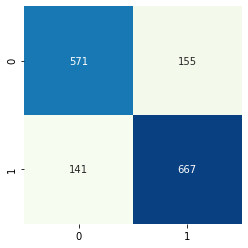

In [53]:
print('=======Only Rdkit Finger Print========')
evaluation(y_test, y_pred)

=======Only Calculation Results========
Accuacy(正解率) 0.7366362451108214
Precision(適合率) 0.7416267942583732
Recall(再現率) 0.7673267326732673


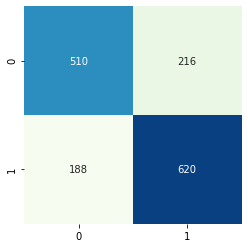

In [54]:
print('=======Only Calculation Results========')
evaluation(y2_test, y2_pred)

=======Calculation Results + Rdkit Finger Print========
Accuacy(正解率) 0.8102998696219035
Precision(適合率) 0.8125755743651754
Recall(再現率) 0.8316831683168316


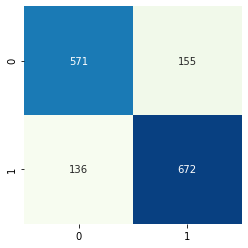

In [55]:
print('=======Calculation Results + Rdkit Finger Print========')
evaluation(y3_test, y3_pred)

=======Only Rescaled Calculation Results========
Accuacy(正解率) 0.7353324641460235
Precision(適合率) 0.7404306220095693
Recall(再現率) 0.7660891089108911


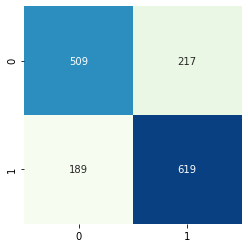

In [56]:
print('=======Only Rescaled Calculation Results========')
evaluation(y4_test, y4_pred)

=======Rescaled Calculation Results + Rdkit Finger Print========
Accuacy(正解率) 0.817470664928292
Precision(適合率) 0.8165467625899281
Recall(再現率) 0.8428217821782178


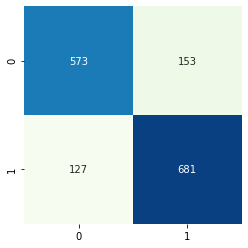

In [57]:
print('=======Rescaled Calculation Results + Rdkit Finger Print========')
evaluation(y5_test, y5_pred)

In [42]:
# Feature Importance
fti = forest.feature_importances_  
fti2 = forest2.feature_importances_  
fti3 = forest3.feature_importances_  
fti4 = forest4.feature_importances_  
fti5 = forest5.feature_importances_ 
fti_df = pd.DataFrame(fti, columns = ['importance'])
fti_Calc_index = mol_props
fti_FC_index = mol_props+list(fti_df.index)
fti2_df = pd.DataFrame(fti2, columns =  ['importance'], index = fti_Calc_index)
fti3_df = pd.DataFrame(fti3, columns =  ['importance'], index = fti_FC_index)
fti4_df = pd.DataFrame(fti4, columns =  ['importance'], index = fti_Calc_index)
fti5_df = pd.DataFrame(fti5, columns =  ['importance'], index = fti_FC_index)
#sort
fti_df = fti_df.sort_values("importance", ascending=False)
fti2_df = fti2_df.sort_values("importance", ascending=False)
fti3_df = fti3_df.sort_values("importance", ascending=False)
fti4_df = fti4_df.sort_values("importance", ascending=False)
fti5_df = fti5_df.sort_values("importance", ascending=False)

=======Only Rdkit Finger Print========


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

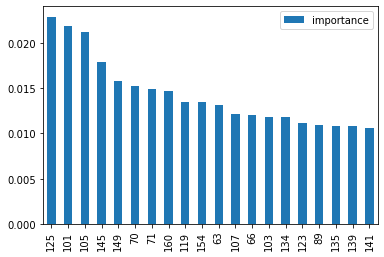

In [43]:
print('=======Only Rdkit Finger Print========')
plt.figure()
fti_df[:20].plot.bar() #Top20

=======Only Calculation Results========


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

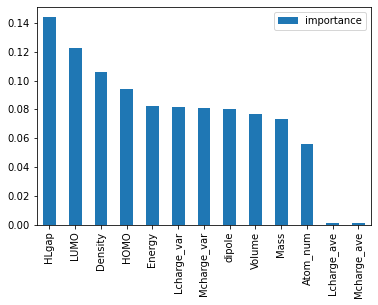

In [44]:
print('=======Only Calculation Results========')
plt.figure()
fti2_df[:20].plot.bar() #Top20

=======Calculation Results + Rdkit Finger Print========


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

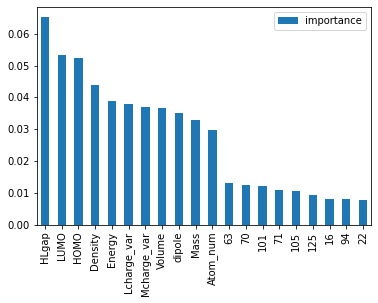

In [45]:
print('=======Calculation Results + Rdkit Finger Print========')
plt.figure()
fti3_df[:20].plot.bar() #Top20

=======Only Rescaled Calculation Results========


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

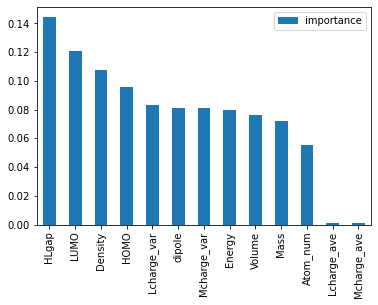

In [46]:
print('=======Only Rescaled Calculation Results========')
plt.figure()
fti4_df[:20].plot.bar() #Top20

=======Rescaled Calculation Results + Rdkit Finger Print========


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

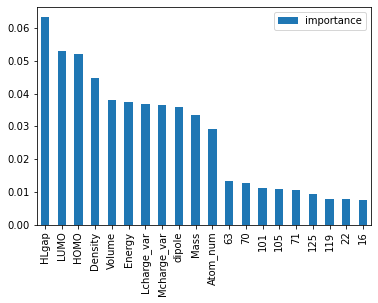

In [47]:
print('=======Rescaled Calculation Results + Rdkit Finger Print========')
plt.figure()
fti5_df[:20].plot.bar() #Top20

In [58]:
#木の数でプロット
tree_num = range(1,200)
training_acc1 = []
test_acc1 =[]
training_acc2 = []
test_acc2 =[]
training_acc3 = []
test_acc3 = []
training_acc4 = []
test_acc4 =[]
training_acc5 = []
test_acc5 = []
for N in tree_num:
    nforest1 = RandomForestClassifier(max_depth=30, n_estimators=N, random_state=0)
    nforest2 = RandomForestClassifier(max_depth=30, n_estimators=N, random_state=0)
    nforest3 = RandomForestClassifier(max_depth=30, n_estimators=N, random_state=0)
    nforest4 = RandomForestClassifier(max_depth=30, n_estimators=N, random_state=0)
    nforest5 = RandomForestClassifier(max_depth=30, n_estimators=N, random_state=0)
    nforest1.fit(X_train, y_train)
    nforest2.fit(X2_train, y2_train)
    nforest3.fit(X3_train, y3_train)
    nforest4.fit(X4_train, y4_train)
    nforest5.fit(X5_train, y5_train)
    training_acc1.append(nforest1.score(X_train, y_train))
    test_acc1.append(nforest1.score(X_test, y_test))
    training_acc2.append(nforest2.score(X2_train, y2_train))
    test_acc2.append(nforest2.score(X2_test, y2_test))
    training_acc3.append(nforest3.score(X3_train, y3_train))
    test_acc3.append(nforest3.score(X3_test, y3_test))
    training_acc4.append(nforest4.score(X4_train, y4_train))
    test_acc4.append(nforest4.score(X4_test, y4_test))
    training_acc5.append(nforest5.score(X5_train, y5_train))
    test_acc5.append(nforest5.score(X5_test, y5_test))

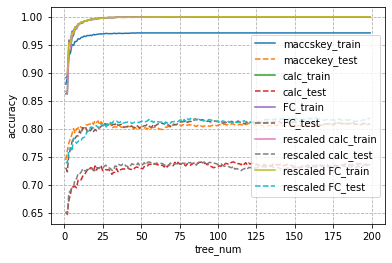

In [59]:
#graph
plt.plot(tree_num, training_acc1, label = 'maccskey_train', linestyle="solid")
plt.plot(tree_num, test_acc1, label = 'maccekey_test', linestyle="dashed")

plt.plot(tree_num, training_acc2, label = 'calc_train', linestyle="solid")
plt.plot(tree_num, test_acc2, label = 'calc_test', linestyle="dashed")

plt.plot(tree_num, training_acc3, label = 'FC_train', linestyle="solid")
plt.plot(tree_num, test_acc3, label = 'FC_test', linestyle="dashed")

plt.plot(tree_num, training_acc4, label = 'rescaled calc_train', linestyle="solid")
plt.plot(tree_num, test_acc4, label = 'rescaled calc_test', linestyle="dashed")

plt.plot(tree_num, training_acc5, label = 'rescaled FC_train', linestyle="solid")
plt.plot(tree_num, test_acc5, label = 'rescaled FC_test', linestyle="dashed")



# 凡例を表示
plt.legend(loc=5)
# グリッド
plt.grid(linestyle='--')
#軸ラベル
plt.xlabel('tree_num')
plt.ylabel('accuracy')

plt.show()

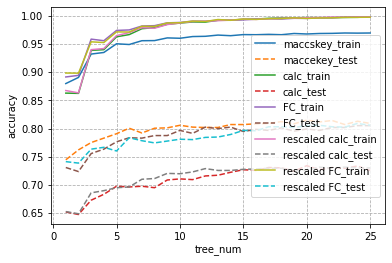

In [61]:
#graph化(拡大)
plt.plot(tree_num[0:25], training_acc1[0:25], label = 'maccskey_train', linestyle="solid")
plt.plot(tree_num[0:25], test_acc1[0:25], label = 'maccekey_test', linestyle="dashed")

plt.plot(tree_num[0:25], training_acc2[0:25], label = 'calc_train', linestyle="solid")
plt.plot(tree_num[0:25], test_acc2[0:25], label = 'calc_test', linestyle="dashed")

plt.plot(tree_num[0:25], training_acc3[0:25], label = 'FC_train', linestyle="solid")
plt.plot(tree_num[0:25], test_acc3[0:25], label = 'FC_test', linestyle="dashed")

plt.plot(tree_num[0:25], training_acc4[0:25], label = 'rescaled calc_train', linestyle="solid")
plt.plot(tree_num[0:25], test_acc4[0:25], label = 'rescaled calc_test', linestyle="dashed")

plt.plot(tree_num[0:25], training_acc5[0:25], label = 'rescaled FC_train', linestyle="solid")
plt.plot(tree_num[0:25], test_acc5[0:25], label = 'rescaled FC_test', linestyle="dashed")



# 凡例を表示
plt.legend(loc=5)
# グリッド
plt.grid(linestyle='--')
#軸ラベル
plt.xlabel('tree_num')
plt.ylabel('accuracy')

plt.show()